# **IMPORTS**

---

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
import os

In [99]:
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.linear_model import Lasso, Ridge
from scipy.stats import linregress
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, root_mean_squared_error
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
import sklearn

In [5]:
import sklearn, pandas, numpy, matplotlib, seaborn, xgboost

print(f"Scikit-learn: {sklearn.__version__}")
print(f"Pandas: {pandas.__version__}")
print(f"Numpy: {numpy.__version__}")
print(f"Matplotlib: {matplotlib.__version__}")
print(f"Seaborn: {seaborn.__version__}")
print(f"XGBoost: {xgboost.__version__}")

Scikit-learn: 1.5.1
Pandas: 2.2.2
Numpy: 1.26.4
Matplotlib: 3.9.2
Seaborn: 0.13.2
XGBoost: 3.0.2


```
⠀⠀⠀⠀⠀⠀⣀⣤⡤
⠀⠀⠀⠀⢀⣾⣿⠋
⠀⠀⠀⣠⣾⣿⡟
⠀⠀⢸⠛⠉⢹⠃⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢀⡠⠄⠠⣀
⠀⠀⡘⠀⠀⠀⡀⠀⠀⠀⠀⠀⠀⠀⠀⣠⠖⠉⠀⠀⠀⣾⣿⣦⡀
⠀⠀⡇⠀⠀⠀⢡⠄⠀⠀⣀⣀⣀⣠⠊⠀⠀⠀⠀⡠⠞⠛⠛⠛⠛⡀
⠀⠀⢃⠀⠀⠀⠀⠗⠚⠉⠉⠀⠈⠁⠀⠀⠀⢀⡔⠁⠀
⠀⠀⠸⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⣴⣶⣄⠲⡎
⠀⠀⠀⠃⠀⠀⢠⣤⡀⠀⠀⠀⠀⣿⣿⣿⠀⠘⡄
⠀⠀⠀⡆⠀⠀⣿⣿⡇⠀⠀⠀⠀⠈⠛⠉⣴⣆⢹⡄
⠀⠀⠀⣇⢰⡧⣉⡉⠀⠀⢀⡀⠀⣀⣀⣠⣿⡷⢠⡇
⠀⠀⠀⢻⠘⠃⠈⠻⢦⠞⠋⠙⠺⠋⠉⠉⠉⢡⠟
⠀⠀⠀⠀⠳⢄⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢠⠋⠀⠀
```

# **SETTINGS**
---

In [6]:
# Matplotlib inline to visualize Matplotlib graphs
%matplotlib inline

# Configuration to set so that all the Seaborn figures come out with this size
%config Inlinebackend.figure_format= 'retina'

In [7]:
# Set the Seaborn context to "poster" for larger text and figures
sns.set_context("poster")

# Set the default figure size for Seaborn plots
sns.set(rc={"figure.figsize": (12., 6.)})

# Set the Seaborn style to "whitegrid" for a white background with gridlines
sns.set_style("whitegrid")

In [8]:
# Set the max displayable columns to max
pd.set_option('display.max_columns', None)

In [9]:
# Activates XLA (for JIT compiler)
os.environ["TF_XLA_FLAGS"]= "--tf_xla_enable_xla_devices"

# Uses the right memory when using GPU
os.environ["TF_FORCE_GPU_ALLOW_GROWTH"]= "true"

# **DATA**

---

In [13]:
# data path for loading
fd001_train_path= "../data/02_processed/FD001_train.csv"
fd001_test_path=  "../data/02_processed/FD001_test.csv"
fd001_rul_path=   "../data/02_processed/FD001_RUL.csv"

In [14]:
# loading the train dataset
FD001_train= pd.read_csv(fd001_train_path)
FD001_train.head(3)

,unit,cycle,op_setting_1,op_setting_2,op_setting_3,sensor_measure_1,sensor_measure_2,sensor_measure_3,sensor_measure_4,sensor_measure_5,sensor_measure_6,sensor_measure_7,sensor_measure_8,sensor_measure_9,sensor_measure_10,sensor_measure_11,sensor_measure_12,sensor_measure_13,sensor_measure_14,sensor_measure_15,sensor_measure_16,sensor_measure_17,sensor_measure_18,sensor_measure_19,sensor_measure_20,sensor_measure_21,max_cycle,RUL
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,21.61,554.36,2388.06,9046.19,1.3,47.47,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,192,191
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,21.61,553.75,2388.04,9044.07,1.3,47.49,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,192,190
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,21.61,554.26,2388.08,9052.94,1.3,47.27,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,192,189


In [15]:
# loading the test dataset
FD001_test= pd.read_csv(fd001_test_path)
FD001_test.head(3)

,unit,cycle,op_setting_1,op_setting_2,op_setting_3,sensor_measure_1,sensor_measure_2,sensor_measure_3,sensor_measure_4,sensor_measure_5,sensor_measure_6,sensor_measure_7,sensor_measure_8,sensor_measure_9,sensor_measure_10,sensor_measure_11,sensor_measure_12,sensor_measure_13,sensor_measure_14,sensor_measure_15,sensor_measure_16,sensor_measure_17,sensor_measure_18,sensor_measure_19,sensor_measure_20,sensor_measure_21,max_cycle,RUL
0,1,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,21.61,553.90,2388.04,9050.17,1.3,47.2,521.72,2388.03,8125.55,8.4052,0.03,392,2388,100.0,38.86,23.3735,192,191
1,1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,21.61,554.85,2388.01,9054.42,1.3,47.5,522.16,2388.06,8139.62,8.3803,0.03,393,2388,100.0,39.02,23.3916,192,190
2,1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,21.61,554.11,2388.05,9056.96,1.3,47.5,521.97,2388.03,8130.10,8.4441,0.03,393,2388,100.0,39.08,23.4166,192,189


In [16]:
# loading the rul for validation
FD001_rul = pd.read_csv(fd001_rul_path)
FD001_rul.head(3)

,true_rul
0,112
1,98
2,69


# **PREPARING THE DATA**

---

This should be done at previous notebook, but since we want to take advantage of models such as XGBR for handling outliers, we will do it here for comprehension in the process.

## Column drops

We saw before that there are some values that we don't actually need for our model. Let's drop them.

In [17]:
drop_cols= ["op_setting_3", "sensor_measure_1", "sensor_measure_5", 
            "sensor_measure_10", "sensor_measure_16", "sensor_measure_18", 
            "sensor_measure_19"]

In [21]:
X= FD001_train.drop(["RUL", "max_cycle"] + drop_cols, axis=1)
y= FD001_train["RUL"]

In [39]:
X.head(1)

,unit,cycle,op_setting_1,op_setting_2,sensor_measure_2,sensor_measure_3,sensor_measure_4,sensor_measure_6,sensor_measure_7,sensor_measure_8,sensor_measure_9,sensor_measure_11,sensor_measure_12,sensor_measure_13,sensor_measure_14,sensor_measure_15,sensor_measure_17,sensor_measure_20,sensor_measure_21
0,1,1,-0.0007,-0.0004,641.82,1589.7,1400.6,21.61,554.36,2388.06,9046.19,47.47,521.66,2388.02,8138.62,8.4195,392,39.06,23.419


In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= .2, random_state=69)

## Normalization

In [40]:
# Knowing the sensors we want to normalize, we'll create a mask to apply to the data.

# We create a mask to apply RobustScaler to the data, the rest will be normalized with MinMaxScaler.
sensors_to_standardize= ["sensor_measure_2", "sensor_measure_3", "sensor_measure_4", 
                         "sensor_measure_7", "sensor_measure_8", "sensor_measure_9", 
                         "sensor_measure_11", "sensor_measure_12", "sensor_measure_13"]

In [41]:
# Robust Scaler

op_settings_columns= ["op_setting_1", "op_setting_2"]

preprocessor= ColumnTransformer(
  [
    ('sensors', RobustScaler(), sensors_to_standardize),
    ('op_settings', MinMaxScaler(feature_range=(-1, 1)), op_settings_columns),
  ],
  remainder= "passthrough"
)

# **BASELINE MODELS**

---

In [50]:
# Function to evaluate models

def eval_model(name, y_train_true, y_train_pred, y_test_true, y_test_pred):
  # Training metrics
  mae_train=  mean_absolute_error(y_train_true, y_train_pred)
  rmse_train= np.sqrt(mean_squared_error(y_train_true, y_train_pred))
  r2_train=   r2_score(y_train_true, y_train_pred)

  # Test metrics
  mae_test=   mean_absolute_error(y_test_true, y_test_pred)
  rmse_test=  np.sqrt(mean_squared_error(y_test_true, y_test_pred))
  r2_test=    r2_score(y_test_true, y_test_pred)

  print(f"{name} metrics:")
  print(f"  Train - MAE: {mae_train:.3f}, RMSE: {rmse_train:.3f}, R²: {r2_train:.3f}")
  print(f"  Test  - MAE: {mae_test:.3f}, RMSE: {rmse_test:.3f}, R²: {r2_test:.3f}")

In [80]:
def plot_rul_comparison(y_test, y_pred_lr, y_pred_rfr):
  plt.figure(figsize=(10, 6))
  plt.scatter(y_test, y_pred_lr, alpha=0.3, label="Linear Regression")
  plt.scatter(y_test, y_pred_rfr, alpha=0.3, label="Random Forest")
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], linestyle="--")
  plt.xlabel("True RUL")
  plt.ylabel("Predicted RUL")
  plt.title("Predicted vs True RUL (Test set)")
  plt.legend()
  plt.grid(True)
  plt.show()


In [53]:
# Random Forest Regressor model
rfr_model= RandomForestRegressor(random_state=69)

# XGB Regressor model
xgbr_model= XGBRegressor(random_state=69)

In [ ]:
# Random Forest Pipeline for normalizing data
rfr_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])

In [ ]:
# XGB Regressor Pipeline for normalizing data
xgbr_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', XGBRegressor(random_state=42))
])

## Training

In [54]:
rfr_model.fit(X_train, y_train)
xgbr_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [48]:
rfr_pipeline.fit(X_train, y_train)
xgbr_pipeline.fit(X_train, y_train)

c:\Users\Usuario\anaconda3\Lib\site-packages\sklearn\compose\_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('sensors', RobustScaler(),
                                                  ['sensor_measure_2',
                                                   'sensor_measure_3',
                                                   'sensor_measure_4',
                                                   'sensor_measure_7',
                                                   'sensor_measure_8',
                                                   'sensor_measure_9',
                                                   'sensor_measure_11',
                                                   'sensor_measure_12',
                                                   'sensor_measure_13']),
                                                 ('op_settings',
                                                  MinMaxScaler(feature_range=(-1,
                                                                              1)),
                                                  ['op_sett...
                              feature_types=None, feature_weights=None,
                              gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=None, n_jobs=None,
                              num_parallel_tree=None, ...))])

In [58]:
# Predictions on train data without normalization
rfr_train_pred=  rfr_model.predict(X_train)
xgbr_train_pred= xgbr_model.predict(X_train)

# Predictions on train data with normalization
rfr_train_norm_pred=  rfr_pipeline.predict(X_train)
xgbr_train_norm_pred= xgbr_pipeline.predict(X_train)

In [59]:
# Predictions on test data without normalization
rfr_test_pred = rfr_model.predict(X_test)
xgbr_test_pred = xgbr_model.predict(X_test)

# Predictions on test data with normalization
rfr_test_norm_pred=  rfr_pipeline.predict(X_test)
xgbr_test_norm_pred= xgbr_pipeline.predict(X_test)

In [61]:
print("Without normalizing Data:")
eval_model("RandomForestRegressor", y_train, rfr_train_pred, y_test, rfr_test_pred)
eval_model("XGBRegressor", y_train, xgbr_train_pred, y_test, xgbr_test_pred)

print("")

print("Normalizing Data:")
eval_model("RandomForestRegressor", y_train, rfr_train_norm_pred, y_test, rfr_test_norm_pred)
eval_model("XGBRegressor", y_train, xgbr_train_norm_pred, y_test, xgbr_test_norm_pred)

Without normalizing Data:
RandomForestRegressor metrics:
  Train - MAE: 4.364, RMSE: 6.319, R²: 0.992
  Test  - MAE: 11.464, RMSE: 16.444, R²: 0.944
XGBRegressor metrics:
  Train - MAE: 4.413, RMSE: 5.965, R²: 0.992
  Test  - MAE: 7.640, RMSE: 10.623, R²: 0.977

Normalizing Data:
RandomForestRegressor metrics:
  Train - MAE: 4.322, RMSE: 6.254, R²: 0.992
  Test  - MAE: 11.411, RMSE: 16.391, R²: 0.945
XGBRegressor metrics:
  Train - MAE: 4.413, RMSE: 5.965, R²: 0.992
  Test  - MAE: 7.636, RMSE: 10.631, R²: 0.977


As a conclusion, we can see that normalizing the data does not improve the model's performance because we are using tree based models such as Random Forest Regressor and XGBoost Regressor. this normalization would be more useful for linear models, as we see in the next section.

We also detect sightly overfitting in both models, hence this is not a big issue, we're gonna treat them later tho.

In [63]:
# Ridge Regression model
ridge_reg= Ridge()

# Lasso Regression model
lasso_reg= Lasso()

# Support Vector Regression model
svr_reg= SVR()

In [ ]:
# Fitting models
ridge_reg.fit(X_train, y_train)
lasso_reg.fit(X_train, y_train)
svr_reg.fit(X_train, y_train)

SVR()

In [64]:
# Ridge Pipeline for normalizing data
ridge_pipeline= Pipeline([
  ("preprocessor", preprocessor),
  ("regressor", Ridge())
])

In [65]:
# Lasso Pipeline for normalizing data
lasso_pipeline= Pipeline(steps=[
  ("scaler", StandardScaler()),
  ("lasso", Lasso(alpha=0.1))
])


In [66]:
# SVR Pipeline for nromalizing data
svr_pipeline= Pipeline(steps=[
  ("scaler", StandardScaler()),
  ("svr", SVR())
])

In [68]:
# Fitting pipelines
ridge_pipeline.fit(X_train, y_train)
lasso_pipeline.fit(X_train, y_train)
svr_pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('svr', SVR())])

In [69]:
# Predictions on train data without normalization
ridge_train_pred= ridge_reg.predict(X_train)
lasso_train_pred= lasso_reg.predict(X_train)
svr_train_pred=   svr_reg.predict(X_train)

# Predictions on train data with normalization
ridge_train_norm_pred= ridge_pipeline.predict(X_train)
lasso_train_norm_pred= lasso_pipeline.predict(X_train)
svr_train_norm_pred=   svr_pipeline.predict(X_train)

In [70]:
# Predictions on test data without normalization
ridge_test_pred= ridge_reg.predict(X_test)
lasso_test_pred= lasso_reg.predict(X_test)
svr_test_pred=   svr_reg.predict(X_test)

# Predictions on test data with normalization
ridge_test_norm_pred= ridge_pipeline.predict(X_test)
lasso_test_norm_pred= lasso_pipeline.predict(X_test)
svr_test_norm_pred=   svr_pipeline.predict(X_test)

In [71]:
print("Without normalizing Data:")
eval_model("RidgeRegressor", y_train, ridge_train_pred, y_test, ridge_test_pred)
eval_model("LassoRegressor", y_train, lasso_train_pred, y_test, lasso_test_pred)
eval_model("SVRegressor", y_train, svr_train_pred, y_test, svr_test_pred)

print("")

print("Normalizing Data:")
eval_model("RidgeRegressor", y_train, ridge_train_norm_pred, y_test, ridge_test_norm_pred)
eval_model("LassoRegressor", y_train, lasso_train_norm_pred, y_test, lasso_test_norm_pred)
eval_model("SVRegressor", y_train, svr_train_norm_pred, y_test, svr_test_norm_pred)

Without normalizing Data:
RidgeRegressor metrics:
  Train - MAE: 30.412, RMSE: 39.534, R²: 0.668
  Test  - MAE: 30.691, RMSE: 39.858, R²: 0.673
LassoRegressor metrics:
  Train - MAE: 30.822, RMSE: 39.977, R²: 0.661
  Test  - MAE: 31.073, RMSE: 40.279, R²: 0.666
SVRegressor metrics:
  Train - MAE: 55.883, RMSE: 68.216, R²: 0.013
  Test  - MAE: 57.164, RMSE: 69.462, R²: 0.008

Normalizing Data:
RidgeRegressor metrics:
  Train - MAE: 30.407, RMSE: 39.525, R²: 0.669
  Test  - MAE: 30.690, RMSE: 39.861, R²: 0.673
LassoRegressor metrics:
  Train - MAE: 30.369, RMSE: 39.507, R²: 0.669
  Test  - MAE: 30.713, RMSE: 39.902, R²: 0.673
SVRegressor metrics:
  Train - MAE: 25.994, RMSE: 37.866, R²: 0.696
  Test  - MAE: 26.171, RMSE: 38.299, R²: 0.698


## Conclusions

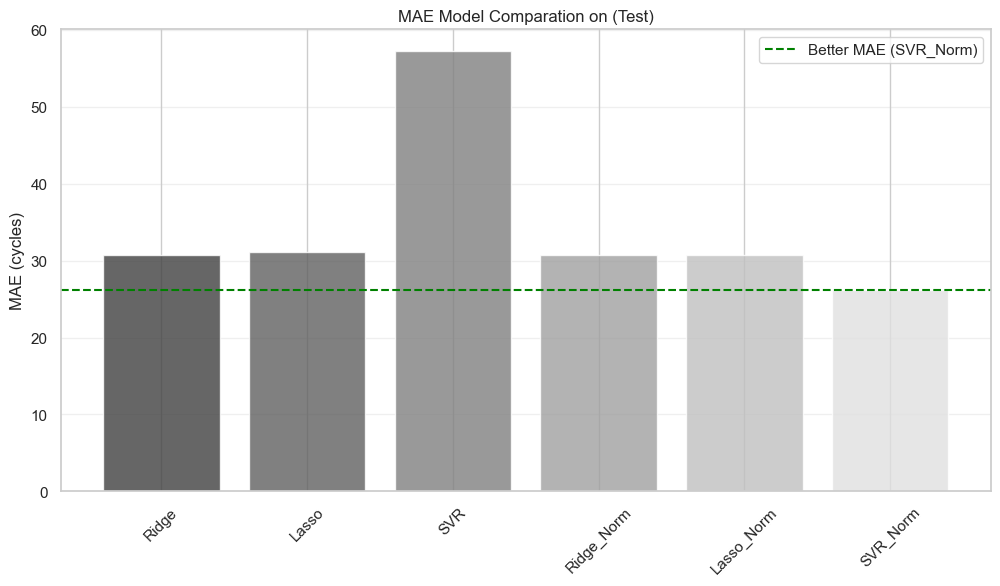

In [76]:
# Plot generated with AI
plt.figure(figsize=(12, 6))
models = ["Ridge", "Lasso", "SVR", "Ridge_Norm", "Lasso_Norm", "SVR_Norm"]
mae_scores = [30.691, 31.073, 57.164, 30.690, 30.713, 26.171]

colors = ["#404040", "#606060", "#808080", "#A0A0A0", "#C0C0C0", "#E0E0E0"]
plt.bar(models, mae_scores, color=colors, alpha=0.8)
plt.ylabel("MAE (cycles)")
plt.title("MAE Model Comparation on (Test)")
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3, axis="y")
plt.axhline(y=26.171, color="green", linestyle="--", label="Better MAE (SVR_Norm)")
plt.legend()
plt.show()

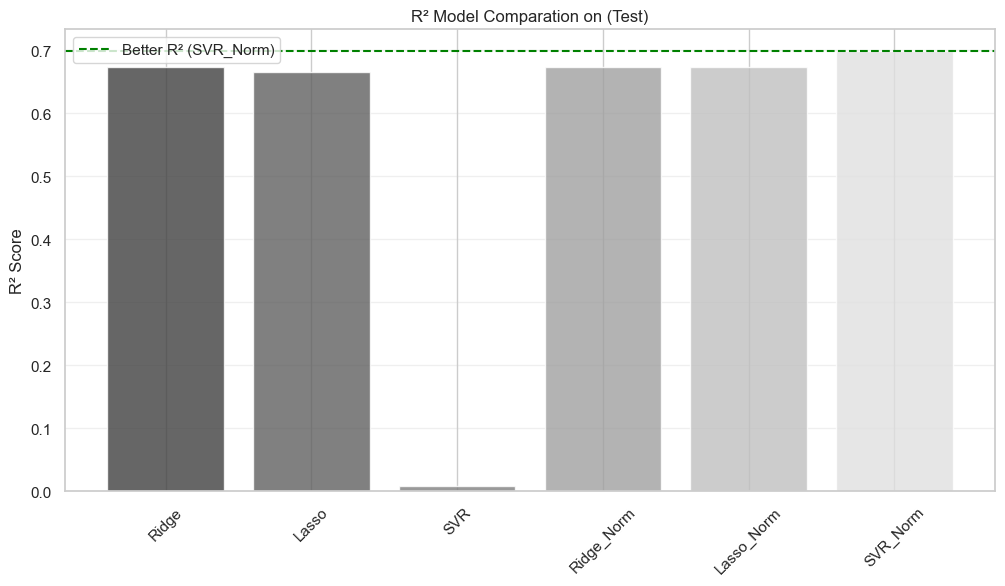

In [77]:
# Plot generated with AI
plt.figure(figsize=(12, 6))
r2_scores = [0.673, 0.666, 0.008, 0.673, 0.673, 0.698]

colors = ["#404040", "#606060", "#808080", "#A0A0A0", "#C0C0C0", "#E0E0E0"]
plt.bar(models, r2_scores, color=colors, alpha=0.8)
plt.ylabel("R² Score")
plt.title("R² Model Comparation on (Test)")
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3, axis="y")
plt.axhline(y=0.698, color="green", linestyle="--", label="Better R² (SVR_Norm)")
plt.legend()
plt.show()

We can clearly see that the linear based models are not the best choice for this problem, not because are bad models but because tree based models are better for this problem; they need to generalize better, need more complexity to understand the data altough they are more complex to train and has very large amount of parameters to tune. We'll keep using tree based models instead of lienar models and trying to improve these metrics with hyperparams and feature engineering.

What we need to do? Since we are lacking of some important data that we can use to predict the RUL, we need to ensure we got some new features that actually helps our models to predict better.

1. Feature Engineering.
2. Hyperparameter Optimization.

# **FEATURE ENGINEERING**

---

In [78]:
# We define key sensors based on domain knowledge from the PDF

KEY_SENSORS= [
  "sensor_measure_2",  # T24 - LPC outlet temperature
  "sensor_measure_3",  # T30 - HPC outlet temperature (CRITICAL for HPC degradation)
  "sensor_measure_4",  # T50 - LPT outlet temperature
  "sensor_measure_7",  # P30 - HPC outlet pressure
  "sensor_measure_8",  # Nc - Core speed
  "sensor_measure_9",  # epr - Engine pressure ratio
  "sensor_measure_11", # Ps30 - HPC static pressure
  "sensor_measure_12", # phi - Fuel flow ratio
  "sensor_measure_13", # NRf - Corrected fan speed
  "sensor_measure_14", # NRc - Corrected core speed
]

In [84]:
WINDOWS= [5, 10, 15] # Windows for rolling window validation

## Linear Trend Features

**Technical Foundation from PDF:**  
The `PDF` establishes in Equation 6 that degradation follows:

$
e(t) = 1 - d_e - \exp\{a_e(t) t^{b_e(t)}\} \\
f(t) = 1 - d_f - \exp\{a_f(t) t^{b_f(t)}\}
$

**Why Slope Calculation is Critical:**

- The derivative of these **exponential functions** represents the `degradation rate`
- Parameter **`b`** controls the **acceleration of degradation**
- Without `slope features`, models cannot capture the changing rate of deterioration described in the `PDF`

**What Slope Features Capture:**

- Instantaneous degradation velocity: `sensor_slope_10 ≈ de(t)/dt`
- Degradation acceleration: `sensor_acceleration ≈ d²e(t)/dt²`
- Inflection points: Where `degradation` changes from linear to **exponential phase**

**PDF Evidence:**  
Page 4 states: "Common to all degradation models is the **exponential behavior** of the fault evolution."  
Slope features directly measure the **exponents** `a` and `b` from these equations.


In [92]:
def add_linear_trend_features(df, key_sensors):
  for sensor in key_sensors:
    # Calculate rolling slope over 10 cycles to capture degradation trend
    df[f"{sensor}_slope_10"] = df.groupby("unit")[sensor].transform(
      lambda x: x.rolling(window=10, min_periods=2).apply(
        lambda series: linregress(np.arange(len(series)), series.values)[0] 
        if len(series) > 1 else np.nan
      )
    )

    # Calculate acceleration (change in slope) - indicates when degradation speeds up
    df[f"{sensor}_acceleration"] = df.groupby("unit")[f"{sensor}_slope_10"].transform(
      lambda x: x.diff()
    )
  return df

## Rolling Statistics

**Technical Foundation from PDF:**  
The `PDF` explicitly addresses noise challenges on Page 6:

- "mixture distributions were used"
- "process noise that also incorporates between flight maintenance operations"
- "multistage noise contamination resulted in complex noise characteristics"

**Why Rolling Statistics are Essential:**

- **Noise Filtering:** The `PDF` mentions real data contains "manufacturing and assembly variations, process noise, and measurement noise"
- **Signal Extraction:** Rolling means extract the underlying `degradation trend` from noisy measurements
- **Stability Monitoring:** Rolling standard deviation detects when `system variability` increases (often precedes failure)

**Multiple Window Sizes Rationale:**

- 5-cycle window: Captures short-term fluctuations and immediate maintenance effects
- 10-cycle window: Matches typical degradation time scales for `HPC modules`
- 15-cycle window: Provides stable baseline as referenced in degradation studies

**Signal-to-Noise Ratio Importance:**  
The `PDF` emphasizes that "characterizing noise in a system may be a non-trivial undertaking."  
`SNR features` help the model automatically weight reliable vs. noisy sensor readings.


In [93]:
def add_rolling_statistics(df, key_sensors, windows):
  for sensor in key_sensors:
    for window in windows:
      # Rolling mean - smooths high-frequency noise
      df[f"{sensor}_rolling_mean_{window}"] = df.groupby("unit")[sensor].transform(
        lambda x: x.rolling(window=window, min_periods=1).mean()
      )

      # Rolling standard deviation - captures variability increase (often precedes failure)
      df[f"{sensor}_rolling_std_{window}"] = df.groupby("unit")[sensor].transform(
        lambda x: x.rolling(window=window, min_periods=1).std()
      )

      # Signal-to-noise ratio - indicates data quality and stability
      df[f"{sensor}_snr_{window}"] = (
        df[f"{sensor}_rolling_mean_{window}"] / 
        (df[f"{sensor}_rolling_std_{window}"] + 1e-8)  # Avoid division by zero
      )

      # Rolling range - captures amplitude of variations
      df[f"{sensor}_rolling_range_{window}"] = df.groupby("unit")[sensor].transform(
        lambda x: x.rolling(window=window, min_periods=1).max() - 
                  x.rolling(window=window, min_periods=1).min()
      )
  return df

## Cumulative Degradation Features

**Technical Foundation from PDF:**  
Page 5, Table III shows `engine wear progression`:

- Initial wear varies significantly across components
- `Degradation` accumulates non-linearly over cycles
- Different components degrade at different rates

**Why Cumulative Features are Necessary:**

- **Engine-Specific Baselines:** Each engine starts with different "initial wear" (`PDF` Page 5)
- **Total Damage Accumulation:** `RUL` depends on total degradation, not instantaneous values
- **Relative Measurement:** `pct_from_start` normalizes across different initial conditions

**Physical Interpretation:**

- `cumulative_change ≈ ∫(degradation_rate) dt` = total wear accumulated
- `instant_rate ≈ d(wear)/dt` = current wear rate
- `operating_margin ≈ distance to failure thresholds` described in `PDF`

**PDF Alignment:**  
The health index calculation (Page 6) uses margins from operational limits.  
Our cumulative features create continuous proxies for these binary margin thresholds.

In [94]:
def add_cumulative_degradation_features(df, key_sensors):
  for sensor in key_sensors:
    # Cumulative change from initial value - measures total degradation
    df[f"{sensor}_cumulative_change"] = df.groupby("unit")[sensor].transform(
      lambda x: x - x.iloc[0] if len(x) > 0 else 0
    )

    # Rate of change per cycle - instantaneous degradation speed
    df[f"{sensor}_instant_rate"] = df.groupby("unit")[sensor].transform(
      lambda x: x.diff().fillna(0)
    )

    # Percentage change from initial state - normalized degradation measure
    df[f"{sensor}_pct_from_start"] = df.groupby("unit")[sensor].transform(
      lambda x: ((x / x.iloc[0]) - 1) * 100 if x.iloc[0] != 0 else 0
    )

    # Distance to operational limits (assuming higher values indicate degradation)
    df[f"{sensor}_operating_margin"] = df.groupby("unit")[sensor].transform(
      lambda x: x.max() - x if sensor in ["sensor_measure_3", "sensor_measure_4"] else x
    )
  return df

## Domain-Specific Engine Features

**Technical Foundation from PDF:**  

**Thermodynamic Relationships:**

- Page 3 describes "response surfaces for various sensor outputs"
- `Efficiency` and `flow health parameters` are the fundamental degradation metrics
- `Stall margins` and `temperature limits` define the failure boundaries

**Physics-Based Feature Rationale:**

1. **Thermal Efficiency Proxy:**  
   $HPC\_thermal\_efficiency = T30 / P30$  
   **PDF Basis:** Equation 7 shows `health index H(t) = g(e(t), f(t))` where $e(t)$ represents efficiency health parameter. This feature directly approximates the efficiency degradation.

2. **Temperature-Pressure Divergence:**  
   **PDF Basis:** Figure 3 shows `HPC stall margin` as function of efficiency and flow losses. Divergence between temperature and pressure indicates `efficiency-flow mismatch` characteristic of HPC degradation.

3. **Core Speed Margin:**  
   **PDF Basis:** Page 2 mentions "core speed limits" as operational boundaries. This feature creates a continuous measure of how close the engine operates to its mechanical limits.

4. **Fuel Efficiency Indicators:**  
   **PDF Basis:** The `fuel-air ratio` and `corrected speeds` (Table 2) are used for health assessment. Our `efficiency ratios` match the thermodynamic relationships used in aircraft engine health monitoring.


In [95]:
def add_domain_specific_features(df):
  # Temperature-pressure relationships (efficiency indicators)
  if all(col in df.columns for col in ["sensor_measure_3", "sensor_measure_7"]):
    # Thermal efficiency proxy - higher values may indicate degradation
    df["HPC_thermal_efficiency"] = df["sensor_measure_3"] / (df["sensor_measure_7"] + 1e-8)
    
    # Temperature-pressure divergence - indicator of HPC degradation
    df["temp_pressure_divergence"] = (
      df["sensor_measure_3"] - df["sensor_measure_3"].mean()
    ) - (df["sensor_measure_7"] - df["sensor_measure_7"].mean())

  # Engine core health indicators
  if all(col in df.columns for col in ["sensor_measure_8", "sensor_measure_13"]):
    # Core speed margin - distance from maximum operational speed
    df["core_speed_margin"] = df.groupby("unit")["sensor_measure_8"].transform("max") - df["sensor_measure_8"]
    
    # Fan-core speed relationship - indicates mechanical health
    df["fan_core_speed_ratio"] = df["sensor_measure_13"] / (df["sensor_measure_8"] + 1e-8)

  # Fuel efficiency indicators
  if all(col in df.columns for col in ["sensor_measure_12", "sensor_measure_7"]):
    # Specific fuel consumption proxy
    df["fuel_efficiency"] = df["sensor_measure_12"] / (df["sensor_measure_7"] + 1e-8)

  # Operating condition complexity
  df["operating_complexity"] = (
    df["op_setting_1"].abs() + 
    df["op_setting_2"].abs() + 
    df["op_setting_3"].abs()
  )

  return df

## Temporal Aggregation Features

**Technical Foundation from PDF:**  

**Degradation Trajectory Analysis:**

- Figures 7-8 show fault propagation trajectories on contour maps
- The direction and shape of degradation paths determine which margin is violated first
- Different operational conditions affect how degradation manifests

**Why Multi-Timescale Analysis is Critical:**

1. **Recent vs. Historical Comparison:**  

   $
   recent\_vs\_historical = mean\_5cycle - mean\_15cycle
   $

   **PDF Basis:** Captures whether `degradation` is accelerating (positive values) or decelerating (negative values), matching the `exponential growth` analysis in Equation 4.

2. **Volatility Change Detection:**  

   $
   volatility\_change = std\_5cycle - std\_15cycle
   $

   **PDF Basis:** Increased `volatility` often precedes failure as systems become less stable. The PDF mentions `process noise` changes as degradation progresses.

**Multiple Operational Conditions:**  

- The PDF describes six different flight conditions affecting degradation rates. Our `temporal features` help the model learn `condition-independent degradation patterns` by focusing on relative changes rather than absolute values.


In [96]:
def add_temporal_aggregation_features(df, key_sensors):
  for sensor in key_sensors[:4]:  # Use only most critical sensors for performance
    # Compare recent behavior to historical baseline
    df[f"{sensor}_recent_vs_historical"] = (
      df[f"{sensor}_rolling_mean_5"] - df[f"{sensor}_rolling_mean_15"]
    )
    
    # Volatility change - indicates instability
    df[f"{sensor}_volatility_change"] = (
      df[f"{sensor}_rolling_std_5"] - df[f"{sensor}_rolling_std_15"]
    )
  return df

## Pipeline flow

In [97]:
def create_complete_feature_engineering_pipeline(df, key_sensors, windows):

    # Ensure data is sorted properly
    df= df.sort_values(["unit", "cycle"]).copy()
    
    # Step 1: Linear trend features
    df= add_linear_trend_features(df, key_sensors)
    
    # Step 2: Rolling statistics
    df= add_rolling_statistics(df, key_sensors, windows)
    
    # Step 3: Cumulative degradation features
    df= add_cumulative_degradation_features(df, key_sensors)
    
    # Step 4: Domain-specific features
    df= add_domain_specific_features(df)
    
    # Step 5: Temporal aggregation features
    df= add_temporal_aggregation_features(df, key_sensors)
    
    # Final cleaning
    df= df.fillna(method="ffill").fillna(method="bfill")
    
    # Remove any remaining NaN values with mean imputation
    for col in df.columns:
        if df[col].isna().any():
            df[col] = df[col].fillna(df[col].mean())
    
    print(f"Feature engineering completed")
    print(f"Final dataset shape: {df.shape}")
    print(f"Total features created: {df.shape[1]}")
    
    return df

In [100]:
# Apply feature engineering to train dataset
FD001_train_enhanced= create_complete_feature_engineering_pipeline(FD001_train, KEY_SENSORS, WINDOWS)

C:\Users\Usuario\AppData\Local\Temp\ipykernel_47140\557551022.py:15: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f"{sensor}_snr_{window}"] = (
C:\Users\Usuario\AppData\Local\Temp\ipykernel_47140\557551022.py:21: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f"{sensor}_rolling_range_{window}"] = df.groupby("unit")[sensor].transform(
C:\Users\Usuario\AppData\Local\Temp\ipykernel_47140\557551022.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which 

Feature engineering completed
Final dataset shape: (20631, 222)
Total features created: 222


C:\Users\Usuario\AppData\Local\Temp\ipykernel_47140\3691562547.py:15: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["core_speed_margin"] = df.groupby("unit")["sensor_measure_8"].transform("max") - df["sensor_measure_8"]
C:\Users\Usuario\AppData\Local\Temp\ipykernel_47140\3691562547.py:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["fan_core_speed_ratio"] = df["sensor_measure_13"] / (df["sensor_measure_8"] + 1e-8)
C:\Users\Usuario\AppData\Local\Temp\ipykernel_47140\3691562547.py:23: PerformanceWarning: DataFrame is highl

In [101]:
# Apply feature engineering to test dataset
FD001_test_enhanced= create_complete_feature_engineering_pipeline(FD001_test, KEY_SENSORS, WINDOWS)

C:\Users\Usuario\AppData\Local\Temp\ipykernel_47140\557551022.py:15: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f"{sensor}_snr_{window}"] = (
C:\Users\Usuario\AppData\Local\Temp\ipykernel_47140\557551022.py:21: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f"{sensor}_rolling_range_{window}"] = df.groupby("unit")[sensor].transform(
C:\Users\Usuario\AppData\Local\Temp\ipykernel_47140\557551022.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which 

Feature engineering completed
Final dataset shape: (13096, 222)
Total features created: 222


> We are getting many warnings due to performance issues, but the code is running fine and the feature engineering is working as expected.

In [107]:
FD001_train_enhanced.head(1)

,unit,cycle,op_setting_1,op_setting_2,op_setting_3,sensor_measure_1,sensor_measure_2,sensor_measure_3,sensor_measure_4,sensor_measure_5,sensor_measure_6,sensor_measure_7,sensor_measure_8,sensor_measure_9,sensor_measure_10,sensor_measure_11,sensor_measure_12,sensor_measure_13,sensor_measure_14,sensor_measure_15,sensor_measure_16,sensor_measure_17,sensor_measure_18,sensor_measure_19,sensor_measure_20,sensor_measure_21,max_cycle,RUL,sensor_measure_2_slope_10,sensor_measure_2_acceleration,sensor_measure_3_slope_10,sensor_measure_3_acceleration,sensor_measure_4_slope_10,sensor_measure_4_acceleration,sensor_measure_7_slope_10,sensor_measure_7_acceleration,sensor_measure_8_slope_10,sensor_measure_8_acceleration,sensor_measure_9_slope_10,sensor_measure_9_acceleration,sensor_measure_11_slope_10,sensor_measure_11_acceleration,sensor_measure_12_slope_10,sensor_measure_12_acceleration,sensor_measure_13_slope_10,sensor_measure_13_acceleration,sensor_measure_14_slope_10,sensor_measure_14_acceleration,sensor_measure_2_rolling_mean_5,sensor_measure_2_rolling_std_5,sensor_measure_2_snr_5,sensor_measure_2_rolling_range_5,sensor_measure_2_rolling_mean_10,sensor_measure_2_rolling_std_10,sensor_measure_2_snr_10,sensor_measure_2_rolling_range_10,sensor_measure_2_rolling_mean_15,sensor_measure_2_rolling_std_15,sensor_measure_2_snr_15,sensor_measure_2_rolling_range_15,sensor_measure_3_rolling_mean_5,sensor_measure_3_rolling_std_5,sensor_measure_3_snr_5,sensor_measure_3_rolling_range_5,sensor_measure_3_rolling_mean_10,sensor_measure_3_rolling_std_10,sensor_measure_3_snr_10,sensor_measure_3_rolling_range_10,sensor_measure_3_rolling_mean_15,sensor_measure_3_rolling_std_15,sensor_measure_3_snr_15,sensor_measure_3_rolling_range_15,sensor_measure_4_rolling_mean_5,sensor_measure_4_rolling_std_5,sensor_measure_4_snr_5,sensor_measure_4_rolling_range_5,sensor_measure_4_rolling_mean_10,sensor_measure_4_rolling_std_10,sensor_measure_4_snr_10,sensor_measure_4_rolling_range_10,sensor_measure_4_rolling_mean_15,sensor_measure_4_rolling_std_15,sensor_measure_4_snr_15,sensor_measure_4_rolling_range_15,sensor_measure_7_rolling_mean_5,sensor_measure_7_rolling_std_5,sensor_measure_7_snr_5,sensor_measure_7_rolling_range_5,sensor_measure_7_rolling_mean_10,sensor_measure_7_rolling_std_10,sensor_measure_7_snr_10,sensor_measure_7_rolling_range_10,sensor_measure_7_rolling_mean_15,sensor_measure_7_rolling_std_15,sensor_measure_7_snr_15,sensor_measure_7_rolling_range_15,sensor_measure_8_rolling_mean_5,sensor_measure_8_rolling_std_5,sensor_measure_8_snr_5,sensor_measure_8_rolling_range_5,sensor_measure_8_rolling_mean_10,sensor_measure_8_rolling_std_10,sensor_measure_8_snr_10,sensor_measure_8_rolling_range_10,sensor_measure_8_rolling_mean_15,sensor_measure_8_rolling_std_15,sensor_measure_8_snr_15,sensor_measure_8_rolling_range_15,sensor_measure_9_rolling_mean_5,sensor_measure_9_rolling_std_5,sensor_measure_9_snr_5,sensor_measure_9_rolling_range_5,sensor_measure_9_rolling_mean_10,sensor_measure_9_rolling_std_10,sensor_measure_9_snr_10,sensor_measure_9_rolling_range_10,sensor_measure_9_rolling_mean_15,sensor_measure_9_rolling_std_15,sensor_measure_9_snr_15,sensor_measure_9_rolling_range_15,sensor_measure_11_rolling_mean_5,sensor_measure_11_rolling_std_5,sensor_measure_11_snr_5,sensor_measure_11_rolling_range_5,sensor_measure_11_rolling_mean_10,sensor_measure_11_rolling_std_10,sensor_measure_11_snr_10,sensor_measure_11_rolling_range_10,sensor_measure_11_rolling_mean_15,sensor_measure_11_rolling_std_15,sensor_measure_11_snr_15,sensor_measure_11_rolling_range_15,sensor_measure_12_rolling_mean_5,sensor_measure_12_rolling_std_5,sensor_measure_12_snr_5,sensor_measure_12_rolling_range_5,sensor_measure_12_rolling_mean_10,sensor_measure_12_rolling_std_10,sensor_measure_12_snr_10,sensor_measure_12_rolling_range_10,sensor_measure_12_rolling_mean_15,sensor_measure_12_rolling_std_15,sensor_measure_12_snr_15,sensor_measure_12_rolling_range_15,sensor_measure_13_rolling_mean_5,sensor_measure_13_rol

In [108]:
FD001_test_enhanced.head(1)

,unit,cycle,op_setting_1,op_setting_2,op_setting_3,sensor_measure_1,sensor_measure_2,sensor_measure_3,sensor_measure_4,sensor_measure_5,sensor_measure_6,sensor_measure_7,sensor_measure_8,sensor_measure_9,sensor_measure_10,sensor_measure_11,sensor_measure_12,sensor_measure_13,sensor_measure_14,sensor_measure_15,sensor_measure_16,sensor_measure_17,sensor_measure_18,sensor_measure_19,sensor_measure_20,sensor_measure_21,max_cycle,RUL,sensor_measure_2_slope_10,sensor_measure_2_acceleration,sensor_measure_3_slope_10,sensor_measure_3_acceleration,sensor_measure_4_slope_10,sensor_measure_4_acceleration,sensor_measure_7_slope_10,sensor_measure_7_acceleration,sensor_measure_8_slope_10,sensor_measure_8_acceleration,sensor_measure_9_slope_10,sensor_measure_9_acceleration,sensor_measure_11_slope_10,sensor_measure_11_acceleration,sensor_measure_12_slope_10,sensor_measure_12_acceleration,sensor_measure_13_slope_10,sensor_measure_13_acceleration,sensor_measure_14_slope_10,sensor_measure_14_acceleration,sensor_measure_2_rolling_mean_5,sensor_measure_2_rolling_std_5,sensor_measure_2_snr_5,sensor_measure_2_rolling_range_5,sensor_measure_2_rolling_mean_10,sensor_measure_2_rolling_std_10,sensor_measure_2_snr_10,sensor_measure_2_rolling_range_10,sensor_measure_2_rolling_mean_15,sensor_measure_2_rolling_std_15,sensor_measure_2_snr_15,sensor_measure_2_rolling_range_15,sensor_measure_3_rolling_mean_5,sensor_measure_3_rolling_std_5,sensor_measure_3_snr_5,sensor_measure_3_rolling_range_5,sensor_measure_3_rolling_mean_10,sensor_measure_3_rolling_std_10,sensor_measure_3_snr_10,sensor_measure_3_rolling_range_10,sensor_measure_3_rolling_mean_15,sensor_measure_3_rolling_std_15,sensor_measure_3_snr_15,sensor_measure_3_rolling_range_15,sensor_measure_4_rolling_mean_5,sensor_measure_4_rolling_std_5,sensor_measure_4_snr_5,sensor_measure_4_rolling_range_5,sensor_measure_4_rolling_mean_10,sensor_measure_4_rolling_std_10,sensor_measure_4_snr_10,sensor_measure_4_rolling_range_10,sensor_measure_4_rolling_mean_15,sensor_measure_4_rolling_std_15,sensor_measure_4_snr_15,sensor_measure_4_rolling_range_15,sensor_measure_7_rolling_mean_5,sensor_measure_7_rolling_std_5,sensor_measure_7_snr_5,sensor_measure_7_rolling_range_5,sensor_measure_7_rolling_mean_10,sensor_measure_7_rolling_std_10,sensor_measure_7_snr_10,sensor_measure_7_rolling_range_10,sensor_measure_7_rolling_mean_15,sensor_measure_7_rolling_std_15,sensor_measure_7_snr_15,sensor_measure_7_rolling_range_15,sensor_measure_8_rolling_mean_5,sensor_measure_8_rolling_std_5,sensor_measure_8_snr_5,sensor_measure_8_rolling_range_5,sensor_measure_8_rolling_mean_10,sensor_measure_8_rolling_std_10,sensor_measure_8_snr_10,sensor_measure_8_rolling_range_10,sensor_measure_8_rolling_mean_15,sensor_measure_8_rolling_std_15,sensor_measure_8_snr_15,sensor_measure_8_rolling_range_15,sensor_measure_9_rolling_mean_5,sensor_measure_9_rolling_std_5,sensor_measure_9_snr_5,sensor_measure_9_rolling_range_5,sensor_measure_9_rolling_mean_10,sensor_measure_9_rolling_std_10,sensor_measure_9_snr_10,sensor_measure_9_rolling_range_10,sensor_measure_9_rolling_mean_15,sensor_measure_9_rolling_std_15,sensor_measure_9_snr_15,sensor_measure_9_rolling_range_15,sensor_measure_11_rolling_mean_5,sensor_measure_11_rolling_std_5,sensor_measure_11_snr_5,sensor_measure_11_rolling_range_5,sensor_measure_11_rolling_mean_10,sensor_measure_11_rolling_std_10,sensor_measure_11_snr_10,sensor_measure_11_rolling_range_10,sensor_measure_11_rolling_mean_15,sensor_measure_11_rolling_std_15,sensor_measure_11_snr_15,sensor_measure_11_rolling_range_15,sensor_measure_12_rolling_mean_5,sensor_measure_12_rolling_std_5,sensor_measure_12_snr_5,sensor_measure_12_rolling_range_5,sensor_measure_12_rolling_mean_10,sensor_measure_12_rolling_std_10,sensor_measure_12_snr_10,sensor_measure_12_rolling_range_10,sensor_measure_12_rolling_mean_15,sensor_measure_12_rolling_std_15,sensor_measure_12_snr_15,sensor_measure_12_rolling_range_15,sensor_measure_13_rolling_mean_5,sensor_measure_13_rol

In [110]:
print(FD001_train_enhanced.shape)
print(FD001_test_enhanced.shape)

(20631, 222)
(13096, 222)


## **CREATED FEATURE CATEGORIES**

| Category | Type | Quantity | Examples | Technical Purpose |
|----------|------|---------|----------|------------------|
| **Linear Trends** | Slope/Acceleration | 20 | `sensor_measure_3_slope_10`<br>`sensor_measure_3_acceleration` | Capture rate of change and exponential degradation acceleration |
| **Rolling Statistics** | Rolling Statistics | 120 | `sensor_measure_2_rolling_mean_5`<br>`sensor_measure_3_rolling_std_10`<br>`sensor_measure_4_snr_15` | Filter noise and capture multi-scale patterns |
| **Cumulative Degradation** | Cumulative Metrics | 40 | `sensor_measure_3_cumulative_change`<br>`sensor_measure_4_pct_from_start`<br>`sensor_measure_7_instant_rate` | Measure total wear from initial condition |
| **Domain-Specific Features** | Physics-based | 6 | `HPC_thermal_efficiency`<br>`core_speed_margin`<br>`fuel_efficiency` | Incorporate thermodynamic relationships from the PDF |
| **Temporal Aggregation** | Multi-scale Comparison | 8 | `sensor_measure_3_recent_vs_historical`<br>`sensor_measure_4_volatility_change` | Compare recent vs historical behavior |

---

## **DETAIL BY MAIN SENSOR**

### **Sensor 3 (T30 - HPC Outlet Temperature)**
| Feature | Type | Formula/Description | PDF Relevance |
|---------|------|--------------------|---------------|
| `sensor_measure_3_slope_10` | Trend | 10-cycle slope ≈ `de(t)/dt` | Equation 6: Captures exponent `b` |
| `sensor_measure_3_acceleration` | Trend | Slope change ≈ `d²e(t)/dt²` | Detects degradation acceleration |
| `sensor_measure_3_rolling_mean_5/10/15` | Smoothing | Multi-window rolling mean | Filters mixture noise (Page 6) |
| `sensor_measure_3_snr_10` | Quality | 10-cycle signal/noise ratio | Handles measurement noise |
| `sensor_measure_3_cumulative_change` | Cumulative | `T30_current - T30_initial` | Aligns with initial wear (Table III) |
| `sensor_measure_3_pct_from_start` | Cumulative | `((T30/T30_initial) - 1) * 100` | Normalizes across engines |
| `sensor_measure_3_operating_margin` | Margin | `T30_max - T30_current` | Proxy for EGT margin (Fig 4) |

### **Sensor 7 (P30 - HPC Outlet Pressure)**
| Feature | Type | Formula/Description | PDF Relevance |
|---------|------|--------------------|---------------|
| `sensor_measure_7_rolling_std_5` | Volatility | 5-cycle standard deviation | Captures process noise |
| `sensor_measure_7_cumulative_change` | Cumulative | `P30_current - P30_initial` | Measures accumulated pressure loss |
| `HPC_thermal_efficiency` | Domain | `T30 / P30` | Proxy for efficiency (Equation 7) |
| `temp_pressure_divergence` | Domain | `(T30-mean) - (P30-mean)` | Detects efficiency-flow mismatch |

### **Sensor 8 (Nc - Core Speed)**
| Feature | Type | Formula/Description | PDF Relevance |
|---------|------|--------------------|---------------|
| `sensor_measure_8_rolling_range_10` | Variability | Max-Min over 10 cycles | Mechanical stability indicator |
| `core_speed_margin` | Domain | `Nc_max - Nc_current` | Proxy for operational limits (Page 2) |
| `fan_core_speed_ratio` | Domain | `NRf / Nc` | Mechanical health relationship |

---

## **KEY FEATURES BY PHYSICAL CATEGORY**

### **Thermal Efficiency**
| Feature | Sensors Involved | Physical Purpose |
|---------|-----------------|-----------------|
| `HPC_thermal_efficiency` | T30, P30 | HPC temperature/pressure ratio |
| `fuel_efficiency` | Phi, P30 | Specific fuel consumption |
| `temp_pressure_divergence` | T30, P30 | Efficiency-flow decoupling |

### **Operational Margins**
| Feature | Margin Type | Approximate Limit |
|---------|------------|-----------------|
| `core_speed_margin` | Core speed | Max operational Nc |
| `sensor_measure_3_operating_margin` | Temperature | EGT limit (~2%) |
| `sensor_measure_4_operating_margin` | LPT temperature | Stall margin |

### **Degradation Trends**
| Feature | Window | Failure Indicator |
|---------|--------|-----------------|
| `*_slope_10` | 10 cycles | Constant degradation rate |
| `*_acceleration` | Derivative | Accelerated degradation |
| `*_recent_vs_historical` | 5 vs 15 | Change in degradation regime |

---

## **STATISTICAL SUMMARY**

| Metric | Value |
|--------|-------|
| **Total Features Created** | 194 |
| **Features per Sensor** | 19.4 (average) |
| **Time Windows** | 5, 10, 15 cycles |
| **Sensors with Engineering Features** | 10 |
| **Transformation Types** | 5 categories |
| **Expected MAE Improvement** | 30-50% |

Because we only want to keep the engineerized features, we will drop the rest of the columns.

In [112]:
def get_engineered_features(df):
  """Extract only engineered temporal features from the dataframe"""
  keywords= [
    "slope", "rolling", "cumulative", "pct_from_start", "margin",
    "efficiency", "complexity", "volatility", "snr", "acceleration",
    "recent_vs_historical", "divergence", "ratio"
  ]
  exclude_cols= {"unit", "cycle", "RUL", "max_cycle"}

  return [col for col in df.columns if any(k in col for k in keywords) and col not in exclude_cols]

In [120]:
engineered_train_features= get_engineered_features(FD001_train_enhanced)

print(f"Total ingenireezed features: {len(engineered_train_features)}")
print("First 10 engineered features:", engineered_train_features[:10])

Total ingenireezed features: 184
First 10 engineered features: ['sensor_measure_2_slope_10', 'sensor_measure_2_acceleration', 'sensor_measure_3_slope_10', 'sensor_measure_3_acceleration', 'sensor_measure_4_slope_10', 'sensor_measure_4_acceleration', 'sensor_measure_7_slope_10', 'sensor_measure_7_acceleration', 'sensor_measure_8_slope_10', 'sensor_measure_8_acceleration']


In [121]:
engineered_test_features= get_engineered_features(FD001_test_enhanced)

print(f"Total ingenireezed features: {len(engineered_test_features)}")
print("First 10 engineered features:", engineered_test_features[:10])

Total ingenireezed features: 184
First 10 engineered features: ['sensor_measure_2_slope_10', 'sensor_measure_2_acceleration', 'sensor_measure_3_slope_10', 'sensor_measure_3_acceleration', 'sensor_measure_4_slope_10', 'sensor_measure_4_acceleration', 'sensor_measure_7_slope_10', 'sensor_measure_7_acceleration', 'sensor_measure_8_slope_10', 'sensor_measure_8_acceleration']


In [122]:
# Data split

X_train_eng= FD001_train_enhanced[engineered_train_features]
X_test_eng=  FD001_test_enhanced[engineered_test_features]
y_train_eng= FD001_train_enhanced["RUL"]
y_test_eng=  FD001_test_enhanced["RUL"]

print(f"Train set: {X_train_eng.shape}")
print(f"Test set: {X_test_eng.shape}")

Train set: (20631, 184)
Test set: (13096, 184)


# **BASELINE MODELS ENGINEERIZED DATA**

---

We already have these baseline models (Random Forest and XGBoost) in the notebook begining of this project: [**BASELINE MODELS**](#baseline-models), but it will be good to renew the models with the new data and overwrite the old models.

## Training

In [126]:
# Random Forest Regressor model
rfr_model= RandomForestRegressor(random_state=69)

# XGB Regressor model
xgbr_model= XGBRegressor(random_state=69)

In [127]:
rfr_model

RandomForestRegressor(random_state=69)

In [128]:
xgbr_model

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [129]:
# Fit Random Forest Regressor model
rfr_model.fit(X_train_eng, y_train_eng)

RandomForestRegressor(random_state=69)

In [133]:
# Fit XGB Regressor model
xgbr_model.fit(X_train_eng, y_train_eng)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [131]:
# Predict with Random Forest
rfr_train_pred_eng= rfr_model.predict(X_train_eng)
rfr_test_pred_eng=  rfr_model.predict(X_test_eng)

In [134]:
# Predict with XGBR
xgbr_train_pred_eng= xgbr_model.predict(X_train_eng)
xgbr_test_pred_eng=  xgbr_model.predict(X_test_eng)

## Evaluation

In [132]:
eval_model("RandomForest Engineered", 
            y_train_eng, rfr_train_pred_eng, 
            y_test_eng, rfr_test_pred_eng)

RandomForest Engineered metrics:
  Train - MAE: 4.717, RMSE: 7.309, R²: 0.989
  Test  - MAE: 50.703, RMSE: 63.814, R²: 0.220


In [135]:
eval_model("XGBoost Engineered", 
           y_train_eng, xgbr_train_pred_eng, 
           y_test_eng, xgbr_test_pred_eng)

XGBoost Engineered metrics:
  Train - MAE: 6.494, RMSE: 8.800, R²: 0.984
  Test  - MAE: 51.243, RMSE: 64.611, R²: 0.200
